In [42]:
import argparse
import numpy as np
import gudhi
import matplotlib.pyplot as plot
import seaborn as sns

In [43]:
print("Secuencias:\n")
print("A/chicken/Zhejiang/329/2011(H9N2)")
print("A/brambling/Beijing/16/2012(H9N2)")
print("A/quail/Lebanon/273/2010(H9N2))")
print("A/duck/Wuxi/7/2010(H9N2)")
print("A/quail/Wuxi/7/2010(H9N2)")
print("A/baikal teal/Xianghai/421/2011(H9N2)")
print("A/Shanghai/02/2013(H7N9)")
print("A/wild bird/Korea/A14/2011(H7N9)")
print("A/duck/Zhejiang/2/2011(H7N3)")
print("A/duck/Zhejiang/10/2011(H7N3)")

Secuencias:

A/chicken/Zhejiang/329/2011(H9N2)
A/brambling/Beijing/16/2012(H9N2)
A/quail/Lebanon/273/2010(H9N2))
A/duck/Wuxi/7/2010(H9N2)
A/quail/Wuxi/7/2010(H9N2)
A/baikal teal/Xianghai/421/2011(H9N2)
A/Shanghai/02/2013(H7N9)
A/wild bird/Korea/A14/2011(H7N9)
A/duck/Zhejiang/2/2011(H7N3)
A/duck/Zhejiang/10/2011(H7N3)


In [44]:
sG3 = [
    [0.0, 294.0, 1274.0, 581.0, 571.0, 1383.0, 1295.0, 2020.0, 2103.0, 2083.0],
    [294.0, 0.0, 1303.0, 651.0, 639.0, 1422.0, 1220.0, 2027.0, 2120.0, 2092.0],
    [1274.0, 1303.0, 0.0, 1470.0, 1452.0, 1032.0, 2080.0, 1673.0, 1999.0, 1982.0],
    [581.0, 651.0, 1470.0, 0.0, 73.0, 1337.0, 1645.0, 2161.0, 2057.0, 2038.0],
    [571.0, 639.0, 1452.0, 73.0, 0.0, 1319.0, 1634.0, 2150.0, 2049.0, 2026.0],
    [1383.0, 1422.0, 1032.0, 1337.0, 1319.0, 0.0, 2114.0, 1684.0, 1801.0, 1786.0],
    [1295.0, 1220.0, 2080.0, 1645.0, 1634.0, 2114.0, 0.0, 1092.0, 1711.0, 1690.0],
    [2020.0, 2027.0, 1673.0, 2161.0, 2150.0, 1684.0, 1092.0, 0.0, 1535.0, 1526.0],
    [2103.0, 2120.0, 1999.0, 2057.0, 2049.0, 1801.0, 1711.0, 1535.0, 0.0, 75.0],
    [2083.0, 2092.0, 1982.0, 2038.0, 2026.0, 1786.0, 1690.0, 1526.0, 75.0, 0.0]
]



# Convertir la lista a una matriz NumPy
sG3 = np.array(sG3)

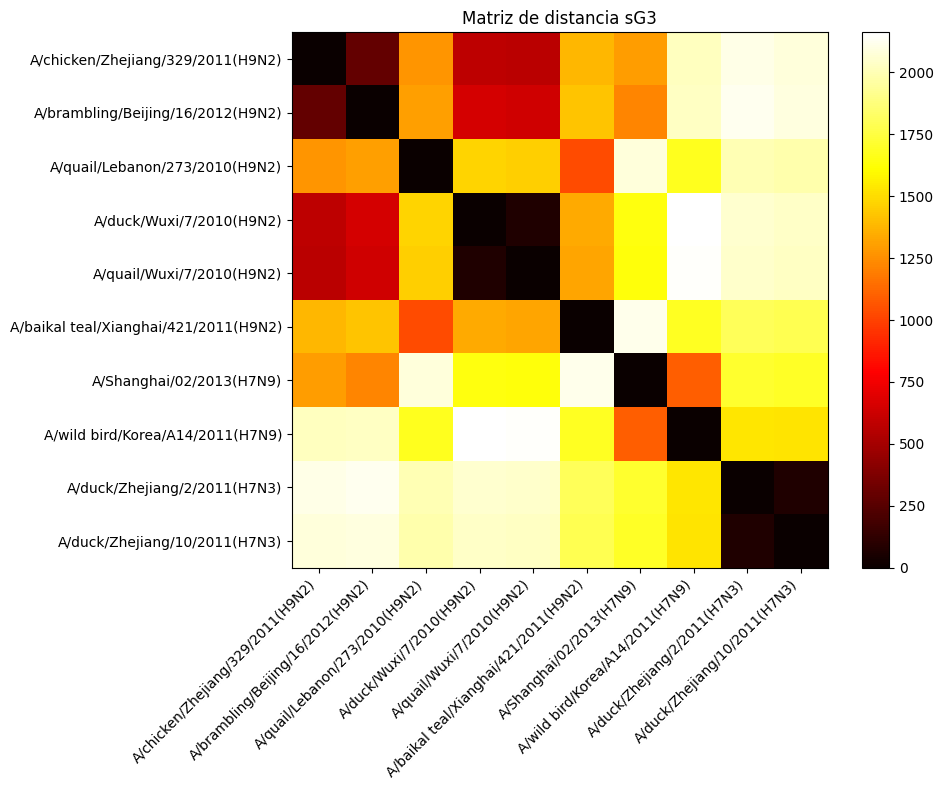

In [50]:
# Definir las etiquetas para las columnas y filas
labels = [
    'A/chicken/Zhejiang/329/2011(H9N2)',
    'A/brambling/Beijing/16/2012(H9N2)',
    'A/quail/Lebanon/273/2010(H9N2)',
    'A/duck/Wuxi/7/2010(H9N2)',
    'A/quail/Wuxi/7/2010(H9N2)',
    'A/baikal teal/Xianghai/421/2011(H9N2)',
    'A/Shanghai/02/2013(H7N9)',
    'A/wild bird/Korea/A14/2011(H7N9)',
    'A/duck/Zhejiang/2/2011(H7N3)',
    'A/duck/Zhejiang/10/2011(H7N3)'
]

# Crea una figura con 1 fila y 1 columna
fig, ax = plot.subplots(1, 1, figsize=(10, 8))

# Grafica la matriz sG3 como una gráfica de calor
im = ax.imshow(sG3, cmap='hot')

# Personaliza el subplot
ax.set_title('Matriz de distancia sG3')

# Establece las posiciones y etiquetas para las columnas y filas
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)

# Agrega una barra de colores
cbar = fig.colorbar(im, ax=ax)

# Muestra la figura
plot.tight_layout()
plot.show()

In [46]:
max_edge_length = 4000
max_dimension = 5
band = 0.0

print("#####################################################################")
print("RipsComplex creation from defined distance matrix G3")
   
rips_complex = gudhi.RipsComplex(
   distance_matrix=sG3, max_edge_length=max_edge_length  
)

#####################################################################
RipsComplex creation from defined distance matrix G3


In [47]:
simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)
   
message = "Number of simplices=" + repr(simplex_tree.num_simplices()) 
print(message)
  
diag = simplex_tree.persistence()

print("betti_numbers()=")
print(simplex_tree.betti_numbers())

Number of simplices=847
betti_numbers()=
[1, 0, 0, 0, 0]


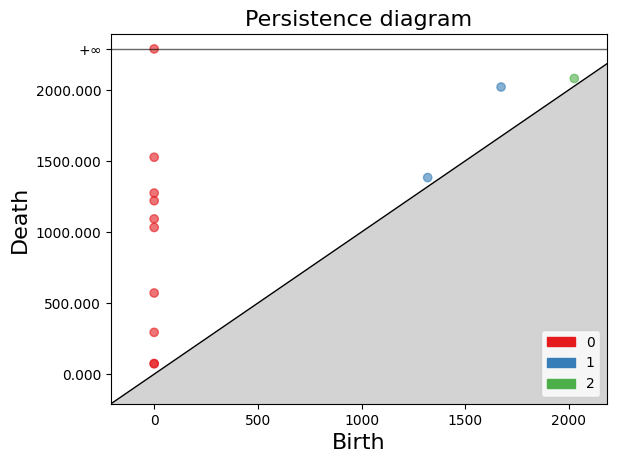

In [48]:
gudhi.plot_persistence_diagram(diag, band=band)
plot.show()

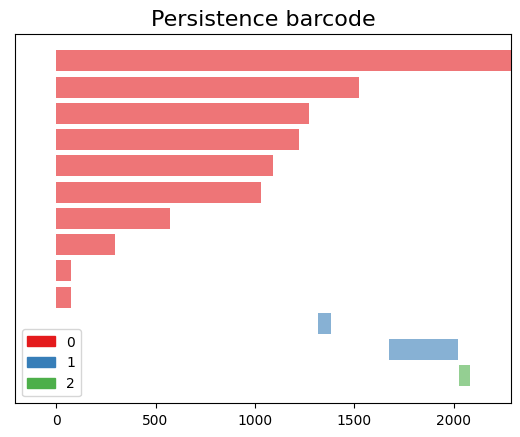

In [49]:
gudhi.plot_persistence_barcode(diag)
plot.show()